✅ CONEXIÓN EXITOSA: Datos cargados desde el repositorio remoto.

Dimensiones del Dataset: 128 participantes
------------------------------
             count        mean        std    min     25%    50%    75%    max
grupo                                                                        
Control       64.0  287.984375  53.786613  182.0  254.25  285.0  320.5  411.0
Tratamiento   64.0  423.078125  59.181267  262.0  388.75  421.5  457.5  567.0

RESULTADOS DEL T-TEST (Student)
Diferencia de medias: 135.09 cm
Estadístico t:        13.5142
P-valor:              2.82e-26
Tamaño del efecto (d):2.39

>> CONCLUSIÓN: Rechazamos la Hipótesis Nula.
>> Existe una diferencia significativa: La práctica AUMENTA la asunción de riesgo.


/tmp/ipython-input-1943967435.py:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='grupo', y='distancia_apuesta_cm', data=df,


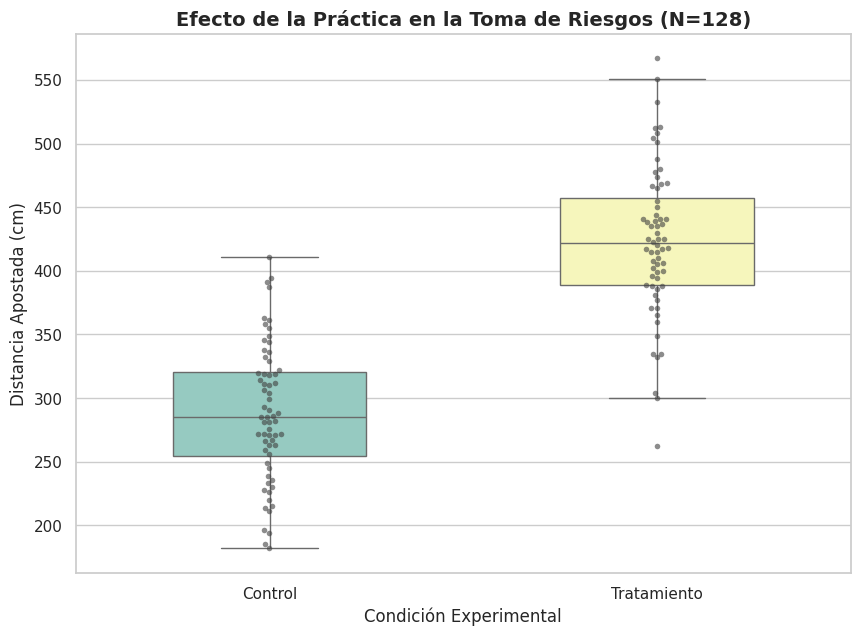

In [1]:
# ==========================================
# PROYECTO AERO-RISK: SCRIPT DE ANÁLISIS
# ==========================================
# Este script descarga los datos crudos, verifica la integridad,
# ejecuta pruebas de hipótesis y genera visualizaciones.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

# ---------------------------------------------------------
# 1. INGESTIÓN DE DATOS (Trazabilidad)
# ---------------------------------------------------------
# EJEMPLO (Sustituye esta URL por la tuya real de GitHub):
url_datos = 'https://raw.githubusercontent.com/Teoriadejuego/aero_risk/main/aero_risk_128.csv'

try:
    # Intentamos leer desde la nube
    df = pd.read_csv(url_datos)
    print("✅ CONEXIÓN EXITOSA: Datos cargados desde el repositorio remoto.")
except:
    # Si falla (por ejemplo, si el link no es público o correcto), intentamos local
    print("⚠️ AVISO: No se pudo conectar a GitHub. Buscando archivo local...")
    try:
        df = pd.read_csv('aero_risk_128.csv')
        print("✅ LOCAL: Datos cargados desde archivo local.")
    except:
        print("❌ ERROR CRÍTICO: No se encuentran los datos. Sube el CSV.")

# Verificación rápida de la estructura
if 'df' in locals():
    print(f"\nDimensiones del Dataset: {df.shape[0]} participantes")
    print("-" * 30)
    print(df.groupby('grupo')['distancia_apuesta_cm'].describe())

# ---------------------------------------------------------
# 2. INFERENCIA ESTADÍSTICA (Prueba de Hipótesis)
# ---------------------------------------------------------
if 'df' in locals():
    # Definimos los vectores de datos
    grupo_control = df[df['grupo'] == 'Control']['distancia_apuesta_cm']
    grupo_tratamiento = df[df['grupo'] == 'Tratamiento']['distancia_apuesta_cm']

    # Test de Levene (Homogeneidad de varianzas)
    stat_levene, p_levene = stats.levene(grupo_control, grupo_tratamiento)
    equal_var = True if p_levene > 0.05 else False

    # T-Test para muestras independientes
    t_stat, p_val = stats.ttest_ind(grupo_tratamiento, grupo_control, equal_var=equal_var)

    # Cálculo del tamaño del efecto (d de Cohen)
    n1, n2 = len(grupo_control), len(grupo_tratamiento)
    s1, s2 = np.std(grupo_control, ddof=1), np.std(grupo_tratamiento, ddof=1)
    s_pooled = np.sqrt(((n1 - 1) * s1**2 + (n2 - 1) * s2**2) / (n1 + n2 - 2))
    cohen_d = (np.mean(grupo_tratamiento) - np.mean(grupo_control)) / s_pooled

    print("\n" + "="*40)
    print("RESULTADOS DEL T-TEST (Student)")
    print("="*40)
    print(f"Diferencia de medias: {grupo_tratamiento.mean() - grupo_control.mean():.2f} cm")
    print(f"Estadístico t:        {t_stat:.4f}")
    print(f"P-valor:              {p_val:.2e}") # Notación científica si es muy bajo
    print(f"Tamaño del efecto (d):{cohen_d:.2f}")

    if p_val < 0.05:
        print("\n>> CONCLUSIÓN: Rechazamos la Hipótesis Nula.")
        print(">> Existe una diferencia significativa: La práctica AUMENTA la asunción de riesgo.")
    else:
        print("\n>> CONCLUSIÓN: No se rechaza la Hipótesis Nula.")

# ---------------------------------------------------------
# 3. VISUALIZACIÓN CIENTÍFICA
# ---------------------------------------------------------
    sns.set_theme(style="whitegrid")
    plt.figure(figsize=(10, 7))

    # 1. Diagrama de Caja (Boxplot) para ver la distribución estadística
    ax = sns.boxplot(x='grupo', y='distancia_apuesta_cm', data=df,
                     palette="Set3", width=0.5, showfliers=False)

    # 2. Diagrama de Enjambre (Swarmplot) para ver los datos crudos (Transparencia)
    sns.swarmplot(x='grupo', y='distancia_apuesta_cm', data=df,
                  color=".25", alpha=0.6, size=4)

    # Etiquetas y Estilo
    plt.title('Efecto de la Práctica en la Toma de Riesgos (N=128)', fontsize=14, fontweight='bold')
    plt.ylabel('Distancia Apostada (cm)', fontsize=12)
    plt.xlabel('Condición Experimental', fontsize=12)

    # Añadimos una línea indicando la media de cada grupo
    medias = df.groupby('grupo')['distancia_apuesta_cm'].mean()

    # Renderizar
    plt.show()